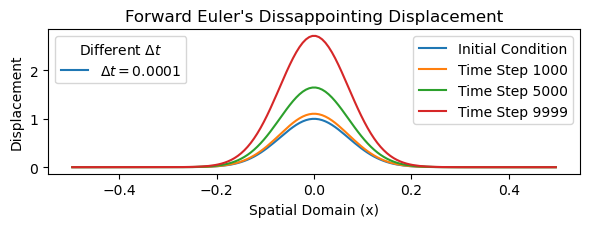

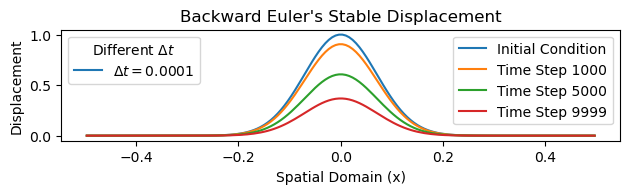

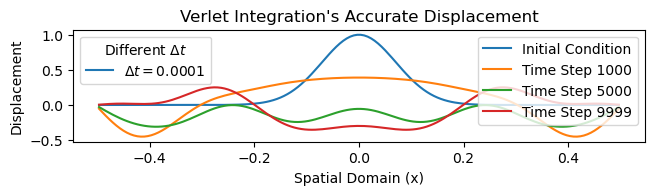

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst

# Re-plotting the displacement for each method based on the code provided in the Jupyter notebook
# Parameters
N = 150  ### for smoothness baby
L = 1.0
h = L / N
x = -L / 2 + h * np.arange(0, N) + h / 2  # Ths is going to track displacement
k = np.arange(1, N + 1) * np.pi / L

# More paramters
f1 = 256 #f1 = sqrt(T/M) *1/2L 
lambda_ = 2*np.pi*k*f1

# dt = 2/np.max(lambda_)
# N_ts = int(1/dt)
dt = 0.0001
N_ts = int(1/0.0001)
# Initial condition functions
def H0(x):
    return np.exp(-100*(x**2))

def Ht0(x):
    return np.zeros_like(x)

# Initial conditions in spatial domain
A0 = H0(x)
V0 = Ht0(x)

# Compute DST of the initial conditions
An = dst(A0, type=1)
Vn = dst(V0, type=1)
I = np.eye(2)
# Forward Euler Method Displacement Plot
solutions_forward_euler_disp = []
An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
for n in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]])  
        
        W_new = np.matmul((I + dt * M_k), W_n)
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    A_spatial = idst(An, type=1)
    solutions_forward_euler_disp.append(A_spatial)

selected_steps = [0, 1000, 5000, 9999]
# Visualization
plt.figure(figsize=(6,6))
plt.subplot(3, 1, 1)

lines = []  # List to hold the line objects for the first legend
labels = []  # List to hold the labels for the first legend

for step in selected_steps:
    if step == 0:  # or whatever value represents the first time step in your data
        label = 'Initial Condition'
    else:
        label = f'Time Step {step}'
    line, = plt.plot(x, solutions_forward_euler_disp[step], label=label)
    
    lines.append(line)
    labels.append(label)

# First legend
legend1 = plt.legend(lines, labels, loc='upper right')
plt.gca().add_artist(legend1)

# Second legend
plt.legend([lines[0]], ['$\Delta t = 0.0001$'], loc='upper left', title='Different $\Delta t$')

plt.title('Forward Euler\'s Dissappointing Displacement')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')

# Adjust layout
plt.tight_layout()
plt.show()


# Backward Euler Method Displacement Plot
solutions_backward_euler_disp = []
An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
for n in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]]) 
        
        W_new = np.linalg.solve((I + dt * M_k), W_n)
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    A_spatial = idst(An, type=1)
    solutions_backward_euler_disp.append(A_spatial)

# Visualization
plt.subplot(3, 1, 2)

lines = []  # List to hold the line objects for the first legend
labels = []  # List to hold the labels for the first legend

for step in selected_steps:
    if step == 0:  # or whatever value represents the first time step in your data
        label = 'Initial Condition'
    else:
        label = f'Time Step {step}'
    line, = plt.plot(x, solutions_backward_euler_disp[step], label=label)
    
    lines.append(line)
    labels.append(label)

# First legend
legend1 = plt.legend(lines, labels, loc='upper right')
plt.gca().add_artist(legend1)

# Second legend
plt.legend([lines[0]], ['$\Delta t = 0.0001$'], loc='upper left', title='Different $\Delta t$')

plt.title('Backward Euler\'s Stable Displacement')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')

# Adjust layout
plt.tight_layout()
plt.show()


# Verlet Integration Displacement Plot
solutions_verlet_disp = []
An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
for i in range(N_ts):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N+1):
        lambda_k = 2 * np.pi**2 * k * f1  ## putting a minus in here to make things easier

        V_n1 = -lambda_k*dt*An[k-1] + Vn[k-1]
        A_n1 = An[k-1] + dt * V_n1
        An_new[k-1] = A_n1
        Vn_new[k-1] = V_n1
        
    An, Vn = An_new, Vn_new
    A_spatial = idst(An, type=1)
    solutions_verlet_disp.append(A_spatial)

# Visualization
plt.subplot(3, 1, 3)

lines = []  # List to hold the line objects for the first legend
labels = []  # List to hold the labels for the first legend

for step in selected_steps:
    if step == 0:  # or whatever value represents the first time step in your data
        label = 'Initial Condition'
    else:
        label = f'Time Step {step}'
    line, = plt.plot(x, solutions_verlet_disp[step], label=label, color='')
    
    lines.append(line)
    labels.append(label)

# First legend
legend1 = plt.legend(lines, labels, loc='upper right')
plt.gca().add_artist(legend1)

# Second legend
plt.legend([lines[0]], ['$\Delta t = 0.0001$'], loc='upper left', title='Different $\Delta t$')

plt.title('Verlet Integration\'s Accurate Displacement')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Displacement')

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
from IPython.display import Audio
import numpy as np
N_ts_further_reduced = 100000
# Parameters
Pickup = 4
S_forward_euler = np.zeros(N_ts_further_reduced)

# Recomputing the Forward Euler solution and extracting displacement at 'Pickup'
An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
for n in range(N_ts_further_reduced):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]])
        
        W_new = np.matmul((I + dt * M_k), W_n)
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    Hn = idst(An)
    S_forward_euler[n] = Hn[Pickup]

# Normalizing and saving the sound
Samp_rate = int(len(S_forward_euler) / 1.0)
S_normalized_forward_euler = S_forward_euler / np.max(np.abs(S_forward_euler))

# Returning the audio to listen in the notebook
Audio(S_normalized_forward_euler, rate=Samp_rate)

In [15]:
# Computing the Backward Euler solution and extracting displacement at 'Pickup'
S_backward_euler = np.zeros(N_ts_further_reduced)

An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
for n in range(N_ts_further_reduced):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N + 1):
        W_n = np.array([[An[k-1]], [Vn[k-1]]])
        lambda_k = 2 * np.pi * k * f1
        M_k = np.array([[1, 0], [-lambda_k**2, 0]])
        
        W_new = np.linalg.solve((I - dt * M_k), W_n)  # Implicit step
        
        An_new[k-1], Vn_new[k-1] = W_new[0, 0], W_new[1, 0]
    
    An, Vn = An_new, Vn_new
    Hn = idst(An)
    S_backward_euler[n] = Hn[Pickup]

# Normalizing and saving the sound
S_normalized_backward_euler = S_backward_euler / np.max(np.abs(S_backward_euler))

# Returning the audio to listen in the notebook
Audio(S_normalized_backward_euler, rate=Samp_rate)

In [32]:
# Computing the Verlet Integration solution and extracting displacement at 'Pickup'
S_verlet = np.zeros(N_ts_further_reduced)

An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
A_prev = An  # Needed for Verlet Integration
for n in range(N_ts_further_reduced):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N+1):
        lambda_k =  2 * np.pi**2 * k * f1

        A_n1 = 2 * An[k-1] - A_prev[k-1] - (lambda_k**2) * dt**2 * An[k-1]
        V_n1 = (A_n1 - A_prev[k-1]) / (2 * dt)
        
        An_new[k-1] = A_n1
        Vn_new[k-1] = V_n1

    A_prev = An.copy()
    An, Vn = An_new, Vn_new
    Hn = idst(An)
    S_verlet[n] = Hn[Pickup]

# Normalizing and saving the sound
S_normalized_verlet = S_verlet / np.max(np.abs(S_verlet))

# Returning the audio to listen in the notebook
Audio(S_normalized_verlet, rate=Samp_rate)

In [33]:
x = -L / 2 + h * np.arange(0, N) + h / 2 
dt = 2/np.max(lambda_)
#N_ts_further_reduced = int(1/dt)
N_ts_further_reduced = int(0.2*1/dt)
# Given parameters
L = 1.0  # Assuming a string length of 1 for demonstration purposes
strike_x = 0.1 * L
strike_Amp = 0.5

# Define the initial position function
def H_0(x):
    return strike_Amp * np.where(x < strike_x, x / strike_x, (L - x) / (L - strike_x))

# Test the function
x_values = np.linspace(0, L, 100)
H_values = H_0(x_values)

# Computing the Verlet Integration solution and extracting displacement at 'Pickup'
S_verlet = np.zeros(N_ts_further_reduced)

An = dst(A0, type=1)  # Resetting the initial conditions
Vn = dst(V0, type=1)
A_prev = An  # Needed for Verlet Integration
for n in range(N_ts_further_reduced):
    An_new = np.zeros_like(An)
    Vn_new = np.zeros_like(Vn)
    
    for k in range(1, N+1):
        lambda_k =  2 * np.pi**2 * k * f1

        A_n1 = 2 * An[k-1] - A_prev[k-1] - (lambda_k**2) * dt**2 * An[k-1]
        V_n1 = (A_n1 - A_prev[k-1]) / (2 * dt)
        
        An_new[k-1] = A_n1
        Vn_new[k-1] = V_n1

    A_prev = An.copy()
    An, Vn = An_new, Vn_new
    Hn = idst(An)
    S_verlet[n] = Hn[Pickup]

# Normalizing and saving the sound
S_normalized_verlet = S_verlet / np.max(np.abs(S_verlet))

# Returning the audio to listen in the notebook
Audio(S_normalized_verlet, rate=Samp_rate)

In [29]:
N_ts_further_reduced = int(0.2*1/dt)
N_ts_further_reduced

75798